In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy as cp

In [2]:
## plot given tour
def plot_tour(tour):
    tp = len(tour)
    for ip in range(tp-1):
        start=tour[ip]
        end=tour[ip+1]
        plt.plot([start[0], end[0]],[start[1], end[1]],'ro-')
    start=tour[0]
    end=tour[1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'bo-')
    start=tour[tp-2]
    end=tour[tp-1]
    plt.plot([start[0], end[0]],[start[1], end[1]],'go-')
    plt.show()
## calculate distance of two node
def dist(c1, c2):
    return round(np.linalg.norm(c1-c2),2)

## calculate cost of the given tour
def tour_cost(tour):
    t = len(tour)
    l = 0
    for i in range(t-1):
        l += dist(tour[i], tour[i+1])
    return l

## gives the nearest costumer in the map to the given costumer
## cus : given costumer
## cus_map : costumer map
def find_min(cus, cus_map):
    minimum = 100
    target = 0
    for i, c in enumerate(cus_map):
        if minimum > dist(cus, c):
            target = i
            minimum = dist(cus, c)
    return target, minimum

### find tour acccording to the one sided heuristic
## index : initial customer
## cus_map : costumer map
def one_sided_nn(index, cus_map):
    cus = cus_map[index]
    cus_map.pop(index)
    tour = [cus]
    while len(cus_map) > 0:
        index,_ = find_min(cus, cus_map)
        cus = cus_map[index]
        tour.append(cus)
        cus_map.pop(index)
    tour.append(tour[0])
    plot_tour(tour)
    return tour

### find tour acccording to the double sided heuristic
## index : initial customer
## cus_map : costumer map
def two_sided_nn(index, cus_map):
    cus1 = cus_map[index]
    cus2 = cus_map[index]
    cus_map.pop(index)
    tour = [cus1]
    while len(cus_map) > 0:
        index1, cost1 = find_min(cus1, cus_map)
        index2, cost2 = find_min(cus2, cus_map)
        if cost1 < cost2:
            tour.insert(0, cus_map[index1])
            cus_map.pop(index1)
        else:
            tour.append(cus_map[index2])
            cus_map.pop(index2)
        cus1 = tour[0]
        cus2 = tour[-1]
    tour.append(tour[0])
    plot_tour(tour)
    return tour

### solves tsp problem wrt mode
## file : data file name
## opt_file : optimum solution file
## initial : start costumer
## mode : switch one-sided or two-sided


def solve_tsp(file, opt_file, initial,mode=0):
    data = np.loadtxt(file)
    data = list(data[:, 1:3])
    index = np.loadtxt(opt_file).astype(int)
    opt_tour = [data[i-1] for i in index]
    opt_cost = tour_cost(opt_tour)    
    if mode == 0:
        tour = one_sided_nn(initial-1,data)
    else:
        tour = two_sided_nn(initial-1,data)
    return tour, opt_tour

## do swap operarion
## i : first choice
## j : second choice

def two_opt(tour,i,j):
    new_tour = cp(tour)
    new_tour[i:j+1] = list(reversed(new_tour[i:j+1]))
    return  new_tour

## apply two opt improvement
## tour : given tour
## candidate : holding best neighbor
## new_cost : holding new best cost
def improve(tour):
    cost = tour_cost(tour)
    candidate = cp(tour)
    br = 1
    while(1):
        for node1 in range(1,len(tour)-2):
            for node2 in range(node1+1,len(tour)-1):
                if ((node1!=1) | (node2!=len(tour)-2)): 
                    new_tour = two_opt(tour,node1,node2)
                    new_cost = tour_cost(new_tour)
                    if new_cost < cost:
                        cost = new_cost
                        candidate = cp(new_tour)
                        br = 0
        tour = cp(candidate)
        if br == 1:
            break
        else:
            br = 1       
    plot_tour(tour)
    return cost

# ONE SIDED

******************************************************************************************************
Data/eil51.dat 10


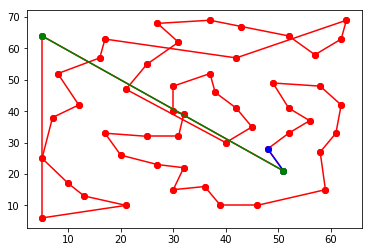

opt_cost: 429.97  cost: 558.8399999999999 =====>>> rate: 0.2997185850175591


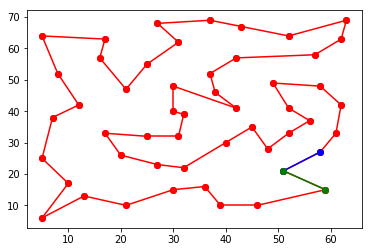

opt_cost: 429.97  improve_cost: 436.85 =====>>> rate: 0.016001116356955124
Improvement: 0.283717468660604
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 20


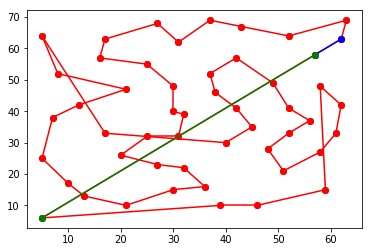

opt_cost: 429.97  cost: 567.29 =====>>> rate: 0.319371118915273


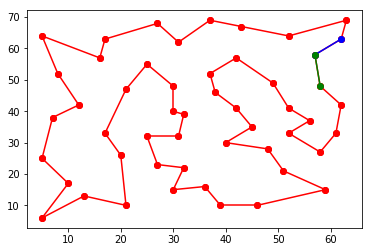

opt_cost: 429.97  improve_cost: 436.72999999999996 =====>>> rate: 0.015722027118170882
Improvement: 0.3036490917971021
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 30


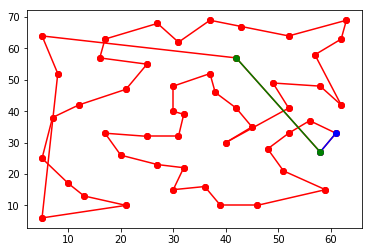

opt_cost: 429.97  cost: 520.0000000000001 =====>>> rate: 0.20938670139777213


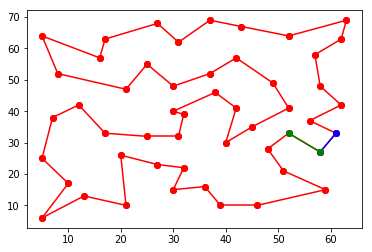

opt_cost: 429.97  improve_cost: 444.11999999999995 =====>>> rate: 0.03290927273995842
Improvement: 0.1764774286578137
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 10


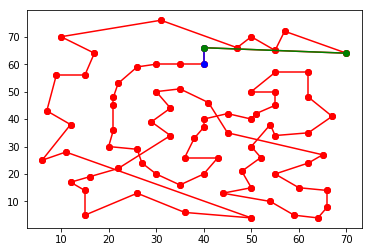

opt_cost: 545.34  cost: 640.48 =====>>> rate: 0.17445996992701798


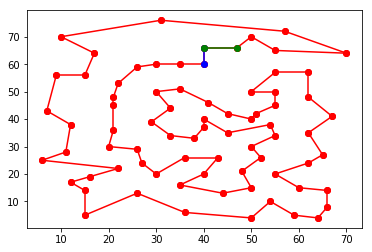

opt_cost: 545.34  improve_cost: 571.23 =====>>> rate: 0.04747496974364614
Improvement: 0.12698500018337183
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 20


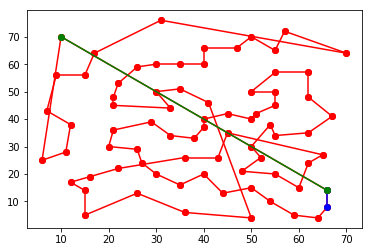

opt_cost: 545.34  cost: 735.9300000000001 =====>>> rate: 0.34948839256243813


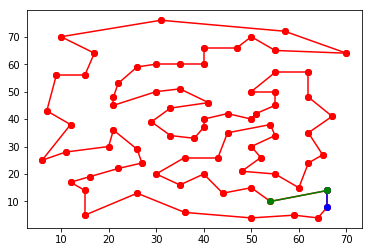

opt_cost: 545.34  improve_cost: 583.99 =====>>> rate: 0.07087321670884214
Improvement: 0.27861517585359596
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 30


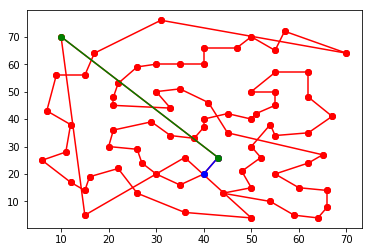

opt_cost: 545.34  cost: 730.23 =====>>> rate: 0.3390361976014963


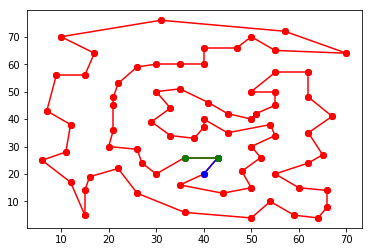

opt_cost: 545.34  improve_cost: 569.96 =====>>> rate: 0.04514614735761177
Improvement: 0.2938900502438845
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 10


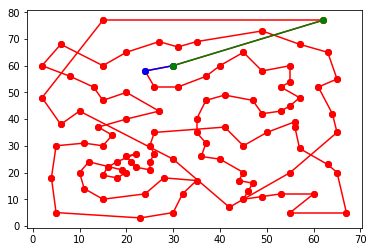

opt_cost: 642.2300000000005  cost: 795.98 =====>>> rate: 0.23940021487628954


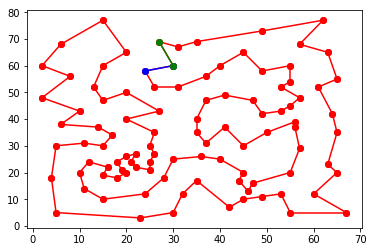

opt_cost: 642.2300000000005  improve_cost: 666.7900000000001 =====>>> rate: 0.03824175139747378
Improvement: 0.20115846347881577
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 20


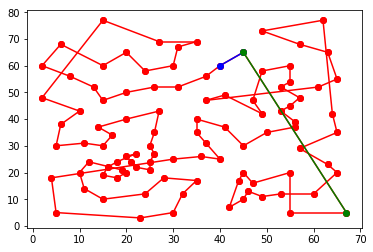

opt_cost: 642.2300000000005  cost: 800.6700000000003 =====>>> rate: 0.246702894601622


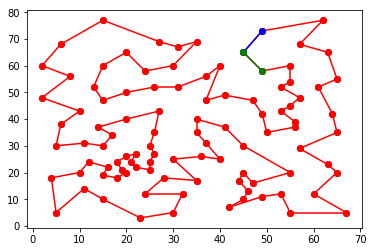

opt_cost: 642.2300000000005  improve_cost: 659.7300000000007 =====>>> rate: 0.027248804945269163
Improvement: 0.21945408965635285
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 30


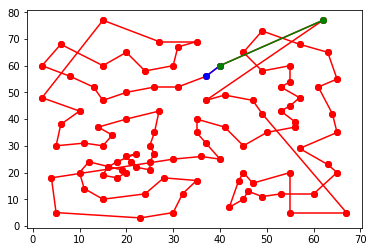

opt_cost: 642.2300000000005  cost: 776.4600000000003 =====>>> rate: 0.20900611930305293


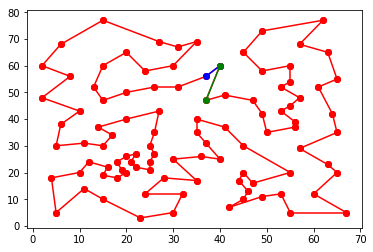

opt_cost: 642.2300000000005  improve_cost: 659.7300000000005 =====>>> rate: 0.02724880494526881
Improvement: 0.18175731435778414
-------------------------------------------------------------------------------


In [3]:
file_list = ['Data/eil51.dat','Data/eil76.dat','Data/eil101.dat']
opt_file_list = ['Data/eil51opt.dat','Data/eil76opt.dat','Data/eil101opt.dat']
initial_list = [10,20,30]
for i in range(3):
    file = file_list[i]
    opt_file = opt_file_list[i]
    for initial in initial_list:
        print("******************************************************************************************************")
        print(file,initial)
        tour, opt_tour = solve_tsp(file,opt_file, initial,mode=0)
        cost = tour_cost(tour)
        opt_cost = tour_cost(opt_tour)
        rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' cost:',cost,'=====>>>','rate:',rate)
        cost = improve(tour)
        new_rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' improve_cost:',cost,'=====>>>','rate:',new_rate)
        print("Improvement:",rate-new_rate)
        print("-------------------------------------------------------------------------------")

# TWO SIDED

******************************************************************************************************
Data/eil51.dat 10


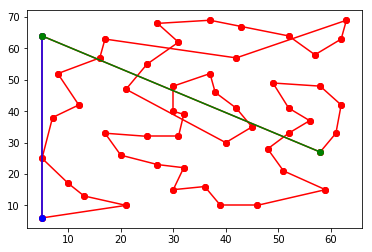

opt_cost: 429.97  cost: 558.47 =====>>> rate: 0.2988580598646417


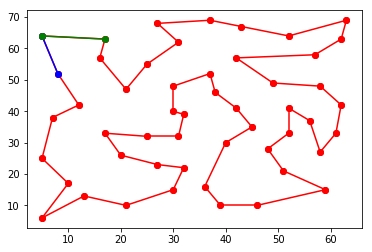

opt_cost: 429.97  improve_cost: 440.52 =====>>> rate: 0.024536595576435456
Improvement: 0.27432146428820625
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 20


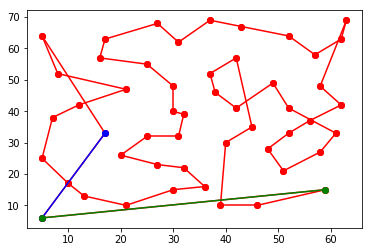

opt_cost: 429.97  cost: 545.56 =====>>> rate: 0.2688327092587853


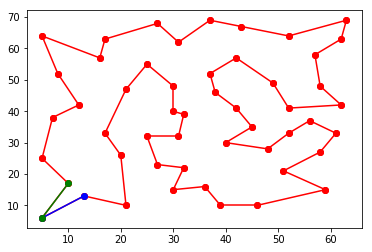

opt_cost: 429.97  improve_cost: 437.9699999999999 =====>>> rate: 0.01860594925227315
Improvement: 0.2502267600065121
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil51.dat 30


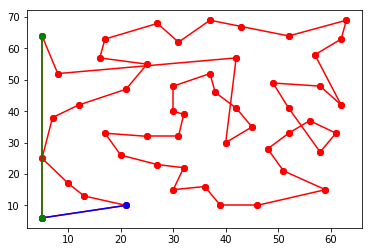

opt_cost: 429.97  cost: 520.6299999999999 =====>>> rate: 0.21085191990138813


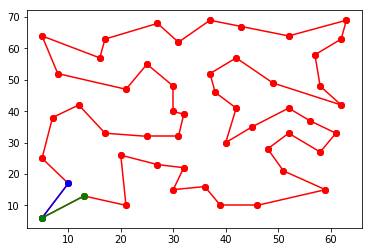

opt_cost: 429.97  improve_cost: 444.21 =====>>> rate: 0.033118589669046565
Improvement: 0.17773333023234156
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 10


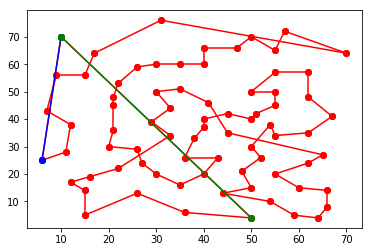

opt_cost: 545.34  cost: 699.02 =====>>> rate: 0.28180584589430435


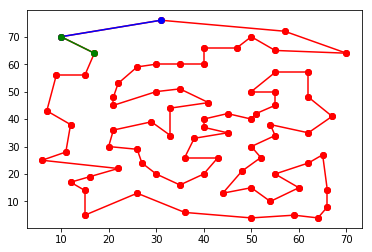

opt_cost: 545.34  improve_cost: 586.7500000000002 =====>>> rate: 0.07593427953203541
Improvement: 0.20587156636226894
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 20


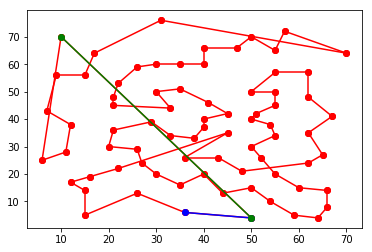

opt_cost: 545.34  cost: 699.95 =====>>> rate: 0.2835112040195108


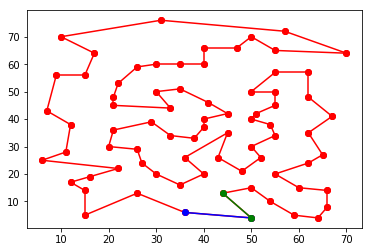

opt_cost: 545.34  improve_cost: 578.9500000000004 =====>>> rate: 0.06163127590127325
Improvement: 0.22187992811823753
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil76.dat 30


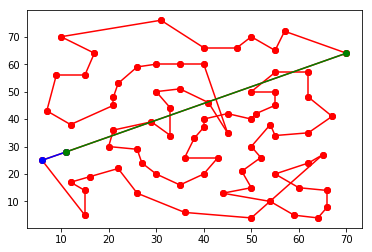

opt_cost: 545.34  cost: 662.8599999999999 =====>>> rate: 0.21549858803682082


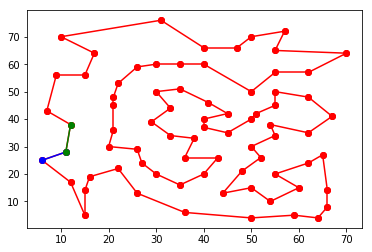

opt_cost: 545.34  improve_cost: 567.0799999999998 =====>>> rate: 0.039865038324714455
Improvement: 0.17563354971210637
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 10


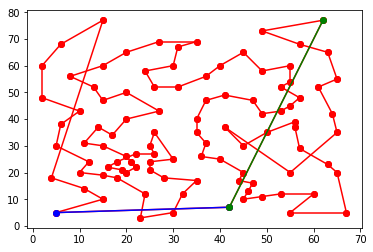

opt_cost: 642.2300000000005  cost: 816.6 =====>>> rate: 0.2715070924746577


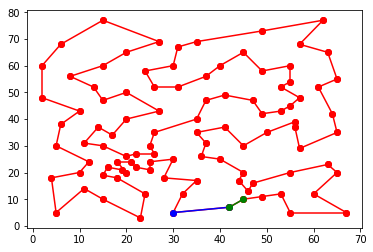

opt_cost: 642.2300000000005  improve_cost: 674.1700000000001 =====>>> rate: 0.049732961711535704
Improvement: 0.221774130763122
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 20


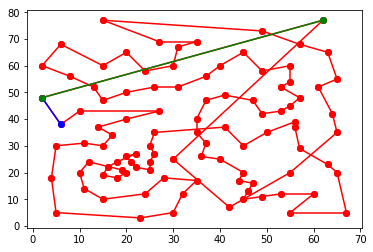

opt_cost: 642.2300000000005  cost: 833.5400000000003 =====>>> rate: 0.29788393566167837


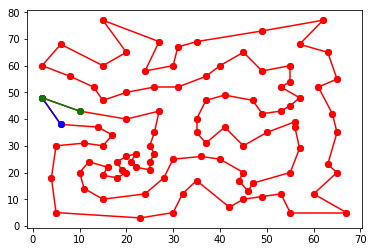

opt_cost: 642.2300000000005  improve_cost: 678.3399999999999 =====>>> rate: 0.056225962661350944
Improvement: 0.24165797300032743
-------------------------------------------------------------------------------
******************************************************************************************************
Data/eil101.dat 30


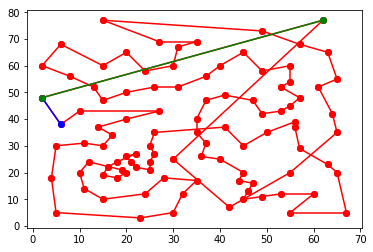

opt_cost: 642.2300000000005  cost: 833.5400000000003 =====>>> rate: 0.29788393566167837


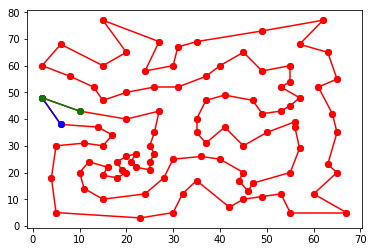

opt_cost: 642.2300000000005  improve_cost: 678.3399999999999 =====>>> rate: 0.056225962661350944
Improvement: 0.24165797300032743
-------------------------------------------------------------------------------


In [4]:
file_list = ['Data/eil51.dat','Data/eil76.dat','Data/eil101.dat']
opt_file_list = ['Data/eil51opt.dat','Data/eil76opt.dat','Data/eil101opt.dat']
initial_list = [10,20,30]
for i in range(3):
    file = file_list[i]
    opt_file = opt_file_list[i]
    for initial in initial_list:
        print("******************************************************************************************************")
        print(file,initial)
        tour, opt_tour = solve_tsp(file,opt_file, initial,mode=1)
        cost = tour_cost(tour)
        opt_cost = tour_cost(opt_tour)
        rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' cost:',cost,'=====>>>','rate:',rate)
        cost = improve(tour)
        new_rate = (cost-opt_cost)/opt_cost
        print('opt_cost:',opt_cost,' improve_cost:',cost,'=====>>>','rate:',new_rate)
        print("Improvement:",rate-new_rate)
        print("-------------------------------------------------------------------------------")